# ICE-12
# Text Summarization.
This ICE has 3 three tasks. In the first Task you need to execute the tutorial and get the outputs. Understand the tutorial properly. The second task answer should be given theoratically but you can use code if required. The aim of the task is explain the difference between different type of summarizations. Finally, the third task is about usage of dataset in the tutorial code that is already provided.

# Task 1: (20%)
## In this task your have to run the tutorial properly. All steps should be followed

# Document Summarization

The idea of document summarization is a
bit different from keyphrase extraction or topic modeling. In this case, the end result
is still in the form of some document, but with a few sentences based on the length we
might want the summary to be. This is similar to an abstract or an executive summary
in a research paper. The main objective of automated document summarization is
to perform this summarization without involving human input, except for running
computer programs. Mathematical and statistical models help in building and
automating the task of summarizing documents by observing their content and context.

There are two broad approaches to document summarization using automated
techniques. They are described as follows:
- __Extraction-based techniques:__ These methods use mathematical
and statistical concepts like SVD to extract some key subset of the
content from the original document such that this subset of content
contains the core information and acts as the focal point of the entire
document. This content can be words, phrases, or even sentences.
The end result from this approach is a short executive summary of a
couple of lines extracted from the original document. No new content
is generated in this technique, hence the name extraction-based.
- __Abstraction-based techniques:__ These methods are more complex
and sophisticated. They leverage language semantics to create
representations and use natural language generation (NLG)
techniques where the machine uses knowledge bases and semantic
representations to generate text on its own and create summaries
just like a human would write them. Thanks to deep learning, we can
implement these techniques easily but they require a lot of data and
compute.

We will cover extraction based methods here due to constraints of needed a lot of data + compute for abstraction based methods. 

# Install necessary dependencies

In [1]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Get Text Document

We use the description of a very popular role-playing game (RPG) Skyrim from
Bethesda Softworks for summarization. 

In [2]:
DOCUMENT = """
The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios 
and published by Bethesda Softworks. It is the fifth main installment in The Elder Scrolls series, 
following The Elder Scrolls IV: Oblivion.
The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, 
a dragon who is prophesied to destroy the world. The game is set 200 years after the events of Oblivion 
and takes place in the fictional province of Skyrim. Over the course of the game, the player completes 
quests and develops the character by improving skills. The game continues the open-world tradition of 
its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore 
or postpone the main storyline indefinitely.
The team opted for a unique and more diverse open world than Oblivion's Imperial Province of Cyrodiil, 
which game director and executive producer Todd Howard considered less interesting by comparison. 
The game was released to critical acclaim, with reviewers particularly mentioning the character advancement 
and setting, and is considered to be one of the greatest video games of all time.


The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or 
third-person perspective. The player may freely roam over the land of Skyrim which is an open world 
environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages. 
Players may navigate the game world more quickly by riding horses or by utilizing a fast-travel system 
which allows them to warp to previously discovered locations. The game's main quest can be completed or 
ignored at the player's preference after the first stage of the quest is finished. However, some quests 
rely on the main storyline being at least partially completed. Non-player characters (NPCs) populate the 
world and can be interacted with in a number of ways: the player may engage them in conversation, 
marry an eligible NPC, kill them or engage in a nonlethal "brawl". The player may 
choose to join factions which are organized groups of NPCs — for example, the Dark Brotherhood, a band 
of assassins. Each of the factions has an associated quest path to progress through. Each city and town 
in the game world has jobs that the player can engage in, such as farming.

Players have the option to develop their character. At the beginning of the game, players create 
their character by selecting their sex and choosing between one of several races including humans, 
orcs, elves, and anthropomorphic cat or lizard-like creatures and then customizing their character's 
appearance. Over the course of the game, players improve their character's skills which are numerical 
representations of their ability in certain areas. There are eighteen skills divided evenly among the 
three schools of combat, magic, and stealth. When players have trained skills enough to meet the 
required experience, their character levels up. Health is depleted primarily when the player 
takes damage and the loss of all health results in death. Magicka is depleted by the use of spells, 
certain poisons and by being struck by lightning-based attacks. Stamina determines the player's 
effectiveness in combat and is depleted by sprinting, performing heavy "power attacks" 
and being struck by frost-based attacks. Skyrim is the first entry in The Elder Scrolls to 
include dragons in the game's wilderness. Like other creatures, dragons are generated randomly in 
the world and will engage in combat with NPCs, creatures and the player. Some dragons may attack 
cities and towns when in their proximity. The player character can absorb the souls of dragons 
in order to use powerful spells called "dragon shouts" or "Thu'um". A regeneration 
period limits the player's use of shouts in gameplay.

Skyrim is set around 200 years after the events of The Elder Scrolls IV: Oblivion, although it is 
not a direct sequel. The game takes place in Skyrim, a province of the Empire on the continent of 
Tamriel, amid a civil war between two factions: the Stormcloaks, led by Ulfric Stormcloak, and the 
Imperial Legion, led by General Tullius. The player character is a Dragonborn, a mortal born with 
the soul and power of a dragon. Alduin, a large black dragon who returns to the land after being 
lost in time, serves as the game's primary antagonist. Alduin is the first dragon created by Akatosh, 
one of the series' gods, and is prophesied to destroy and consume the world.
"""

In [3]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

# Summarization with Gensim

Let’s look at an implementation of document summarization by leveraging Gensim’s
summarization module. It is pretty straightforward.

In [4]:
from gensim.summarization import summarize

print(summarize(DOCUMENT, ratio=0.2, split=False))

The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
Over the course of the game, the player completes quests and develops the character by improving skills.
The game continues the open-world tradition of its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore or postpone the main storyline indefinitely.
The player may freely roam over the land of Skyrim which is an open world environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages.
Each city and town in the game world has jobs that the player can engage in, such as farming.
Over the course of the game, players improve their character's skills which are numerical representations of their ability in certain areas.
Like other creatures, dragons are generated randomly in the world and will engage in combat with NPCs, creatures and the player.


In [5]:
print(summarize(DOCUMENT, word_count=75, split=False))

The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
Over the course of the game, the player completes quests and develops the character by improving skills.
The player may freely roam over the land of Skyrim which is an open world environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages.


In [6]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

35

This summarization implementation from Gensim is based on a variation of
a popular algorithm called TextRank. 

# Basic Text pre-processing

In [7]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['elder scrolls v skyrim action roleplaying video game developed bethesda game studios published bethesda softworks',
       'fifth main installment elder scrolls series following elder scrolls iv oblivion',
       'games main story revolves around player characters quest defeat alduin worldeater dragon prophesied destroy world'],
      dtype='<U183')

# Text Representation with Feature Engineering

We will be vectorizing our normalized sentences using the TF-IDF feature engineering
scheme. We keep things simple and don’t filter out any words based on document
frequency. But feel free to try that out and maybe even leverage n-grams as features.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(270, 35)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
ability,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
absorb,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.0,0.00,0.0,0.0,0.00,0.00
acclaim,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.28,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
action,0.25,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.32,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
advancement,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.28,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
akatosh,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.33
alduin,0.00,0.0,0.25,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.26,0.27
allowing,0.00,0.0,0.00,0.0,0.0,0.27,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
allows,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
although,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.33,0.0,0.0,0.00,0.00


# Latent Semantic Analysis

Here, we summarize our game description by utilizing document sentences. The
terms in each sentence of the document have been extracted to form the term-document matrix, which we observed in the previous cell. 

We apply low-rank Singular Value Decomposition to this matrix. The core principle behind Latent Semantic Analysis (LSA) is that in any document, there exists a latent structure among terms that are related
contextually and hence should also be correlated in the same singular space.

The main idea in our implementation is to use SVD (recall M = USVT) so that U
and V are the orthogonal matrices and S is the diagonal matrix, which can also be
represented as a vector of the singular values. 

The original matrix can be represented as
a term-document matrix where the rows are terms and each column is a document, i.e.,
a sentence from our document in this case. The values can be any type of weighting like
Bag of Words model-based frequencies, TF-IDFs, or binary occurrences.

![](https://i.imgur.com/YtopNr3.png)

In [9]:
from scipy.sparse.linalg import svds


def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [10]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(270, 3) (3,) (3, 35)


In [11]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [12]:
salience_scores = np.sqrt(np.dot(np.square(singular_values),
                                 np.square(topic_document_mat)))
salience_scores

array([0.53291263, 0.61639562, 0.60427539, 0.52307109, 0.50141128,
       0.32352969, 0.1506046 , 0.25383436, 0.60567083, 0.35902104,
       0.22562997, 0.34608934, 0.15781555, 0.40522541, 0.24505982,
       0.19874104, 0.39317895, 0.45392878, 0.31638528, 0.47353378,
       0.18348908, 0.45731421, 0.13929749, 0.38932101, 0.36829067,
       0.57822992, 0.40853736, 0.26260062, 0.38904585, 0.32776714,
       0.67662776, 0.21866561, 0.34687796, 0.3234621 , 0.46107093])

In [13]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [14]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios and published by Bethesda Softworks.
It is the fifth main installment in The Elder Scrolls series, following The Elder Scrolls IV: Oblivion.
The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
The game is set 200 years after the events of Oblivion and takes place in the fictional province of Skyrim.
Over the course of the game, the player completes quests and develops the character by improving skills.
The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or third-person perspective.
Skyrim is the first entry in The Elder Scrolls to include dragons in the game's wilderness.
Skyrim is set around 200 years after the events of The Elder Scrolls IV: Oblivion, although it is not a direct sequel.


# TextRank

The TextRank summarization algorithm internally uses the popular PageRank
algorithm, which is used by Google for ranking websites and pages. This is used by the
Google search engine when providing relevant web pages based on search queries. To
understand TextRank better, we need to understand some of the concepts surrounding
PageRank. The core algorithm in PageRank is a graph-based scoring or ranking
algorithm, where pages are scored or ranked based on their importance. 

Websites and pages contain further links embedded in them which link to more pages having more
links and this continues across the Internet. This can be represented as a graph-based
model where vertices indicate the web pages and edges indicate links among them. This
can be used to form a voting or recommendation system such so when one vertex links
to another one in the graph it is basically casting a vote. 

Vertex importance is decided not only on the number of votes or edges but also the importance of the vertices that are
connected to it and their importance. 

![](https://i.imgur.com/fMyJjUN.png)

We can see that vertex denoting Page C has a higher score than
Page E even if it has fewer edges compared to Page E, because Page B is an important
page connected to Page C.

For textrank we will follow a similar process leveraging pagerank

![](https://i.imgur.com/kkrzeq7.png)

- Tokenize and extract sentences from the document to be
summarized.
- Decide on the number of sentences, k, that we want in the final
summary
- Build a document-term feature matrix using weights like TF-IDF
or Bag of Words.
- Compute a document similarity matrix by multiplying the matrix
by its transpose.
- Use these documents (sentences in our case) as the vertices and
the similarities between each pair of documents as the weight
or score coefficient we talked about earlier and feed them to the
PageRank algorithm.
- Get the score for each sentence.
- Rank the sentences based on score and return the top k sentences.

# Build Similarity Matrix

In [15]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(35, 35)


array([[1.   , 0.182, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.182, 1.   , 0.05 , ..., 0.   , 0.   , 0.084],
       [0.   , 0.05 , 1.   , ..., 0.101, 0.165, 0.319],
       ...,
       [0.   , 0.   , 0.101, ..., 1.   , 0.066, 0.069],
       [0.   , 0.   , 0.165, ..., 0.066, 1.   , 0.123],
       [0.   , 0.084, 0.319, ..., 0.069, 0.123, 1.   ]])

# Build Similarity Graph

In [16]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

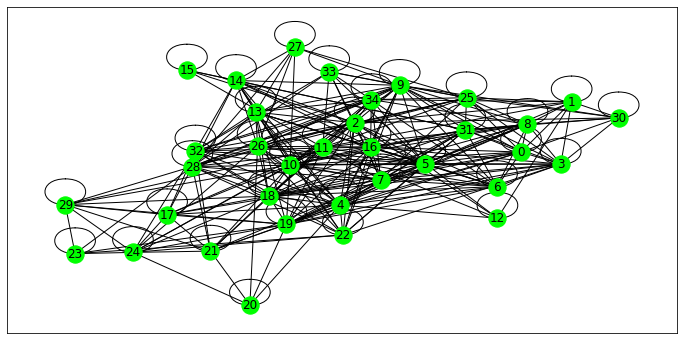

In [17]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

# Get Sentence Importance Scores

In [18]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score
                           in scores.items()),
                          reverse=True)
ranked_sentences[:10]

[(0.037297049797214744, 2),
 (0.034908435475375886, 25),
 (0.03460086870923607, 4),
 (0.03240744530656925, 8),
 (0.03218748996523769, 28),
 (0.031836734268801445, 11),
 (0.031566658693076226, 26),
 (0.03150616293402057, 3),
 (0.031376143577383796, 5),
 (0.031123481531894214, 16)]

In [19]:
top_sentence_indices = [ranked_sentences[index][1]
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [20]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
The game is set 200 years after the events of Oblivion and takes place in the fictional province of Skyrim.
Over the course of the game, the player completes quests and develops the character by improving skills.
The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or third-person perspective.
The game's main quest can be completed or ignored at the player's preference after the first stage of the quest is finished.
Skyrim is the first entry in The Elder Scrolls to include dragons in the game's wilderness.
Like other creatures, dragons are generated randomly in the world and will engage in combat with NPCs, creatures and the player.
The player character can absorb the souls of dragons in order to use powerful spells called "dragon shouts" or "Thu'um".


# Task-2: (30%)
Explain the difference between the summarization techniques covered in the section above

#### TextRank
Pre-process the text: 
* Removing stop words and stemmatizing / lemmatizing the remaining words.
* A graph is created with each node being a sentence, connected to its similar sentences.
* Connect every sentence to every other sentence by an edge. The weight of the edge is how similar the two sentences are.
* The similarity can be measured by
  + the number of common words 
  + Cosine Similarity
  + TF-IDF
* Sentences with maximum recommendations is more likely to get picked for the summary.
* In original TextRank the weights of an edge between two sentences is the percentage of words appearing in both of them. Gensim’s TextRank uses Okapi BM25 function to see how similar the sentences are, which is an improvement.
* Number of common words measure the sentences similarity
* TextRank is primarily used for single documents.

#### Latent Semantic Analysis
* It works on the principle of Term Frequency along with Singular Value Decomposition.
* The idea is to resolve the document space to a "concept space", meaning the document is broken down into the actual underlying concept and comparisons are made within that space.
* LSA works by projecting the data into a lower dimensional space without any significant loss of information. One way to interpret this spatial decomposition operation is that singular vectors can capture and represent word combination patterns which are recurring in the corpus. 
* The magnitude of the singular value indicates the importance of the pattern in a document.

# Task-3: (50%)
1. Use any other dataset to perform the steps covered in Task-1. (25%)
2. Finally after executing, provide your analysis. (25%)

In [38]:
dataset = """The greatest improvements in the productive powers of labour, and the
greater part of the skill, dexterity, and judgment, with which it is
anywhere directed, or applied, seem to have been the effects of the
division of labour. The effects of the division of labour, in the
general business of society, will be more easily understood, by
considering in what manner it operates in some particular
manufactures. It is commonly supposed to be carried furthest in some
very trifling ones; not perhaps that it really is carried further in
them than in others of more importance: but in those trifling
manufactures which are destined to supply the small wants of but a
small number of people, the whole number of workmen must necessarily
be small; and those employed in every different branch of the work can
often be collected into the same workhouse, and placed at once under
the view of the spectator.

In those great manufactures, on the contrary, which are destined to
supply the great wants of the great body of the people, every
different branch of the work employs so great a number of workmen,
that it is impossible to collect them all into the same workhouse. We
can seldom see more, at one time, than those employed in one single
branch. Though in such manufactures, therefore, the work may really be
divided into a much greater number of parts, than in those of a more
trifling nature, the division is not near so obvious, and has
accordingly been much less observed.

To take an example, therefore, from a very trifling manufacture, but
one in which the division of labour has been very often taken notice
of, the trade of a pin-maker: a workman not educated to this business
(which the division of labour has rendered a distinct trade, nor
acquainted with the use of the machinery employed in it (to the
invention of which the same division of labour has probably given
occasion), could scarce, perhaps, with his utmost industry, make one
pin in a day, and certainly could not make twenty. But in the way in
which this business is now carried on, not only the whole work is a
peculiar trade, but it is divided into a number of branches, of which
the greater part are likewise peculiar trades. One man draws out the
wire; another straights it; a third cuts it; a fourth points it; a
fifth grinds it at the top for receiving the head; to make the head
requires two or three distinct operations; to put it on is a peculiar
business; to whiten the pins is another; it is even a trade by itself
to put them into the paper; and the important business of making a pin
is, in this manner, divided into about eighteen distinct operations,
which, in some manufactories, are all performed by distinct hands,
though in others the same man will sometimes perform two or three of
them. I have seen a small manufactory of this kind, where ten men only
were employed, and where some of them consequently performed two or
three distinct operations. But though they were very poor, and
therefore but indifferently accommodated with the necessary machinery,
they could, when they exerted themselves, make among them about twelve
pounds of pins in a day. There are in a pound upwards of four thousand
pins of a middling size. Those ten persons, therefore, could make
among them upwards of forty-eight thousand pins in a day. Each person,
therefore, making a tenth part of forty-eight thousand pins, might be
considered as making four thousand eight hundred pins in a day. But if
they had all wrought separately and independently, and without any of
them having been educated to this peculiar business, they certainly
could not each of them have made twenty, perhaps not one pin in a day;
that is, certainly, not the two hundred and fortieth, perhaps not the
four thousand eight hundredth, part of what they are at present
capable of performing, in consequence of a proper division and
combination of their different operations.

In every other art and manufacture, the effects of the division of
labour are similar to what they are in this very trifling one, though,
in many of them, the labour can neither be so much subdivided, nor
reduced to so great a simplicity of operation. The division of labour,
however, so far as it can be introduced, occasions, in every art, a
proportionable increase of the productive powers of labour. The
separation of different trades and employments from one another, seems
to have taken place in consequence of this advantage. This separation,
too, is generally carried furthest in those countries which enjoy the
highest degree of industry and improvement; what is the work of one
man, in a rude state of society, being generally that of several in an
improved one. In every improved society, the farmer is generally
nothing but a farmer; the manufacturer, nothing but a manufacturer.
The labour, too, which is necessary to produce any one complete
manufacture, is almost always divided among a great number of hands.
How many different trades are employed in each branch of the linen and
woollen manufactures, from the growers of the flax and the wool, to
the bleachers and smoothers of the linen, or to the dyers and dressers
of the cloth! The nature of agriculture, indeed, does not admit of so
many subdivisions of labour, nor of so complete a separation of one
business from another, as manufactures. It is impossible to separate
so entirely the business of the grazier from that of the corn-farmer,
as the trade of the carpenter is commonly separated from that of the
smith. The spinner is almost always a distinct person from the,
weaver; but the ploughman, the harrower, the sower of the seed, and
the reaper of the corn, are often the same. The occasions for those
different sorts of labour returning with the different seasons of the
year, it is impossible that one man should be constantly employed in
any one of them. This impossibility of making so complete and entire a
separation of all the different branches of labour employed in
agriculture, is perhaps the reason why the improvement of the
productive powers of labour, in this art, does not always keep pace
with their improvement in manufactures. The most opulent nations,
indeed, generally excel all their neighbours in agriculture as well as
in manufactures; but they are commonly more distinguished by their
superiority in the latter than in the former. Their lands are in
general better cultivated, and having more labour and expense bestowed
upon them, produce more in proportion to the extent and natural
fertility of the ground. But this superiority of produce is seldom
much more than in proportion to the superiority of labour and expense.
In agriculture, the labour of the rich country is not always much more
productive than that of the poor; or, at least, it is never so much
more productive, as it commonly is in manufactures. The corn of the
rich country, therefore, will not always, in the same degree of
goodness, come cheaper to market than that of the poor. The corn of
Poland, in the same degree of goodness, is as cheap as that of France,
notwithstanding the superior opulence and improvement of the latter
country. The corn of France is, in the corn-provinces, fully as good,
and in most years nearly about the same price with the corn of
England, though, in opulence and improvement, France is perhaps
inferior to England. The corn-lands of England, however, are better
cultivated than those of France, and the corn-lands of France are said
to be much better cultivated than those of Poland. But though the poor
country, notwithstanding the inferiority of its cultivation, can, in
some measure, rival the rich in the cheapness and goodness of its
corn, it can pretend to no such competition in its manufactures, at
least if those manufactures suit the soil, climate, and situation, of
the rich country. The silks of France are better and cheaper than
those of England, because the silk manufacture, at least under the
present high duties upon the importation of raw silk, does not so well
suit the climate of England as that of France. But the hardware and
the coarse woollens of England are beyond all comparison superior to
those of France, and much cheaper, too, in the same degree of
goodness. In Poland there are said to be scarce any manufactures of
any kind, a few of those coarser household manufactures excepted,
without which no country can well subsist.

This great increase in the quantity of work, which, in consequence of
the division of labour, the same number of people are capable of
performing, is owing to three different circumstances; first, to the
increase of dexterity in every particular workman; secondly, to the
saving of the time which is commonly lost in passing from one species
of work to another; and, lastly, to the invention of a great number of
machines which facilitate and abridge labour, and enable one man to do
the work of many.

First, the improvement of the dexterity of the workmen, necessarily
increases the quantity of the work he can perform; and the division of
labour, by reducing every man's business to some one simple operation,
and by making this operation the sole employment of his life,
necessarily increases very much the dexterity of the workman. A common
smith, who, though accustomed to handle the hammer, has never been
used to make nails, if, upon some particular occasion, he is obliged
to attempt it, will scarce, I am assured, be able to make above two or
three hundred nails in a day, and those, too, very bad ones. A smith
who has been accustomed to make nails, but whose sole or principal
business has not been that of a nailer, can seldom, with his utmost
diligence, make more than eight hundred or a thousand nails in a day.
I have seen several boys, under twenty years of age, who had never
exercised any other trade but that of making nails, and who, when they
exerted themselves, could make, each of them, upwards of two thousand
three hundred nails in a day. The making of a nail, however, is by no
means one of the simplest operations. The same person blows the
bellows, stirs or mends the fire as there is occasion, heats the iron,
and forges every part of the nail: in forging the head, too, he is
obliged to change his tools. The different operations into which the
making of a pin, or of a metal button, is subdivided, are all of them
much more simple, and the dexterity of the person, of whose life it
has been the sole business to perform them, is usually much greater.
The rapidity with which some of the operations of those manufactures
are performed, exceeds what the human hand could, by those who had
never seen them, he supposed capable of acquiring.

Secondly, The advantage which is gained by saving the time commonly
lost in passing from one sort of work to another, is much greater than
we should at first view be apt to imagine it. It is impossible to pass
very quickly from one kind of work to another, that is carried on in a
different place, and with quite different tools. A country weaver, who
cultivates a small farm, must loose a good deal of time in passing
from his loom to the field, and from the field to his loom. When the
two trades can be carried on in the same workhouse, the loss of time
is, no doubt, much less. It is, even in this case, however, very
considerable. A man commonly saunters a little in turning his hand
from one sort of employment to another. When he first begins the new
work, he is seldom very keen and hearty; his mind, as they say, does
not go to it, and for some time he rather trifles than applies to good
purpose. The habit of sauntering, and of indolent careless
application, which is naturally, or rather necessarily, acquired by
every country workman who is obliged to change his work and his tools
every half hour, and to apply his hand in twenty different ways almost
every day of his life, renders him almost always slothful and lazy,
and incapable of any vigorous application, even on the most pressing
occasions. Independent, therefore, of his deficiency in point of
dexterity, this cause alone must always reduce considerably the
quantity of work which he is capable of performing.

Thirdly, and lastly, everybody must be sensible how much labour is
facilitated and abridged by the application of proper machinery. It is
unnecessary to give any example. I shall only observe, therefore, that
the invention of all those machines by which labour is so much
facilitated and abridged, seems to have been originally owing to the
division of labour. Men are much more likely to discover easier and
readier methods of attaining any object, when the whole attention of
their minds is directed towards that single object, than when it is
dissipated among a great variety of things. But, in consequence of the
division of labour, the whole of every man's attention comes naturally
to be directed towards some one very simple object. It is naturally to
be expected, therefore, that some one or other of those who are
employed in each particular branch of labour should soon find out
easier and readier methods of performing their own particular work,
whenever the nature of it admits of such improvement. A great part of
the machines made use of in those manufactures in which labour is most
subdivided, were originally the invention of common workmen, who,
being each of them employed in some very simple operation, naturally
turned their thoughts towards finding out easier and readier methods
of performing it. Whoever has been much accustomed to visit such
manufactures, must frequently have been shewn very pretty machines,
which were the inventions of such workmen, in order to facilitate and
quicken their own particular part of the work. In the first fire
engines {this was the current designation for steam engines}, a boy
was constantly employed to open and shut alternately the communication
between the boiler and the cylinder, according as the piston either
ascended or descended. One of those boys, who loved to play with his
companions, observed that, by tying a string from the handle of the
valve which opened this communication to another part of the machine,
the valve would open and shut without his assistance, and leave him at
liberty to divert himself with his play-fellows. One of the greatest
improvements that has been made upon this machine, since it was first
invented, was in this manner the discovery of a boy who wanted to save
his own labour.

All the improvements in machinery, however, have by no means been the
inventions of those who had occasion to use the machines. Many
improvements have been made by the ingenuity of the makers of the
machines, when to make them became the business of a peculiar trade;
and some by that of those who are called philosophers, or men of
speculation, whose trade it is not to do any thing, but to observe
every thing, and who, upon that account, are often capable of
combining together the powers of the most distant and dissimilar
objects in the progress of society, philosophy or speculation becomes,
like every other employment, the principal or sole trade and
occupation of a particular class of citizens. Like every other
employment, too, it is subdivided into a great number of different
branches, each of which affords occupation to a peculiar tribe or
class of philosophers; and this subdivision of employment in
philosophy, as well as in every other business, improve dexterity, and
saves time. Each individual becomes more expert in his own peculiar
branch, more work is done upon the whole, and the quantity of science
is considerably increased by it.
"""

In [39]:
print(summarize(dataset, ratio=0.1, split=False))

The greatest improvements in the productive powers of labour, and the
be small; and those employed in every different branch of the work can
different branch of the work employs so great a number of workmen,
of, the trade of a pin-maker: a workman not educated to this business
(which the division of labour has rendered a distinct trade, nor
peculiar trade, but it is divided into a number of branches, of which
considered as making four thousand eight hundred pins in a day.
separation of different trades and employments from one another, seems
highest degree of industry and improvement; what is the work of one
manufacture, is almost always divided among a great number of hands.
How many different trades are employed in each branch of the linen and
separation of all the different branches of labour employed in
In agriculture, the labour of the rich country is not always much more
This great increase in the quantity of work, which, in consequence of
the division of labour, the same number 

In [40]:
print(summarize(dataset, word_count=75, split=False))

The greatest improvements in the productive powers of labour, and the
be small; and those employed in every different branch of the work can
different branch of the work employs so great a number of workmen,
(which the division of labour has rendered a distinct trade, nor
separation of all the different branches of labour employed in
labour, by reducing every man's business to some one simple operation,
the machines made use of in those manufactures in which labour is most


In [41]:
# Text preprocessing
sentences = nltk.sent_tokenize(dataset)
normalize_corpus = np.vectorize(normalize_document)
norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['greatest improvements productive powers labour greater part skill dexterity judgment anywhere directed applied seem effects division labour',
       'effects division labour general business society easily understood considering manner operates particular manufactures',
       'commonly supposed carried furthest trifling ones perhaps really carried others importance trifling manufactures destined supply small wants small number people whole number workmen must necessarily small employed every different branch work often collected workhouse placed view spectator'],
      dtype='<U366')

In [42]:
# Text representation with feature engineering

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(550, 72)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
able,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.22,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0
abridge,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0
abridged,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.31,0.0,0.3,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0
accommodated,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0
according,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.22,0.0,0.0,0.0,0.00,0.0,0.0
accordingly,0.0,0.0,0.0,0.0,0.0,0.27,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0
account,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.15,0.0,0.0
accustomed,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.19,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.00,0.0,0.0,0.0,0.00,0.0,0.0
acquainted,0.0,0.0,0.0,0.0,0.0,0.00,0.17,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0
acquired,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0


# Laten Semantic Analysis

In [43]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(550, 3) (3,) (3, 72)


In [44]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [45]:
salience_scores = np.sqrt(np.dot(np.square(singular_values),
                                 np.square(topic_document_mat)))
salience_scores

array([0.31842083, 0.25122117, 0.32686856, 0.35335527, 0.28946383,
       0.31584411, 0.50495533, 0.29714168, 0.34466286, 0.24732187,
       0.4593247 , 0.37574376, 0.62474217, 0.5541204 , 0.43304964,
       0.45643273, 0.35267036, 0.28348963, 0.22709549, 0.06394027,
       0.33961206, 0.14833772, 0.34764299, 0.13518402, 0.16712031,
       0.3563709 , 0.40017505, 0.19209825, 0.16555004, 0.2057644 ,
       0.51670277, 0.57847241, 0.61009626, 0.49021662, 0.39330127,
       0.51367858, 0.42193192, 0.50224517, 0.25765255, 0.59127022,
       0.40455376, 0.489408  , 0.56555879, 0.65473376, 0.19313302,
       0.11446778, 0.30072656, 0.21245854, 0.3122193 , 0.30930585,
       0.10421968, 0.17274074, 0.04356606, 0.21742924, 0.1002883 ,
       0.21679935, 0.17494992, 0.19356818, 0.01907414, 0.33214054,
       0.19906747, 0.36587621, 0.32181749, 0.35514706, 0.20484722,
       0.06193847, 0.09965488, 0.19593148, 0.14099952, 0.26779949,
       0.31279501, 0.15617353])

In [46]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [47]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Those ten persons, therefore, could make
among them upwards of forty-eight thousand pins in a day.
Each person,
therefore, making a tenth part of forty-eight thousand pins, might be
considered as making four thousand eight hundred pins in a day.
In agriculture, the labour of the rich country is not always much more
productive than that of the poor; or, at least, it is never so much
more productive, as it commonly is in manufactures.
The corn of the
rich country, therefore, will not always, in the same degree of
goodness, come cheaper to market than that of the poor.
The corn of
Poland, in the same degree of goodness, is as cheap as that of France,
notwithstanding the superior opulence and improvement of the latter
country.
This great increase in the quantity of work, which, in consequence of
the division of labour, the same number of people are capable of
performing, is owing to three different circumstances; first, to the
increase of dexterity in every particular workman; secondly, to

# TextRank

## Build Similarity Matrix

In [48]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(72, 72)


array([[1.   , 0.153, 0.   , ..., 0.056, 0.036, 0.   ],
       [0.153, 1.   , 0.019, ..., 0.079, 0.028, 0.   ],
       [0.   , 0.019, 1.   , ..., 0.036, 0.083, 0.079],
       ...,
       [0.056, 0.079, 0.036, ..., 1.   , 0.276, 0.092],
       [0.036, 0.028, 0.083, ..., 0.276, 1.   , 0.04 ],
       [0.   , 0.   , 0.079, ..., 0.092, 0.04 , 1.   ]])

## Build Similarity Graph

In [49]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

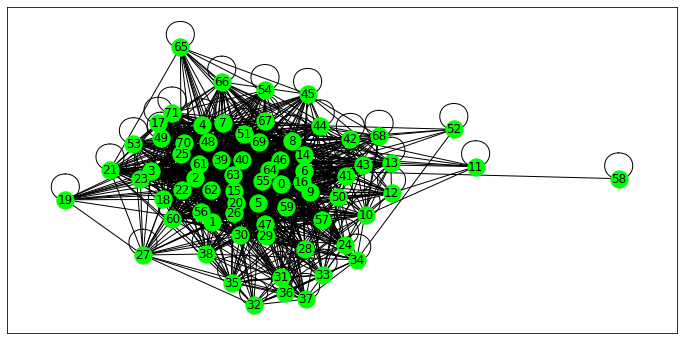

In [50]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

## Get Sentence Importance Scores

In [51]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score
                           in scores.items()),
                          reverse=True)
ranked_sentences[:10]

[(0.02407035528307738, 39),
 (0.022711315177843788, 6),
 (0.019346481404455284, 30),
 (0.01912440374533706, 15),
 (0.01862853755557125, 40),
 (0.01812132956212978, 26),
 (0.017475992058822446, 14),
 (0.01704620262416379, 20),
 (0.016895138850460772, 2),
 (0.016819146190767516, 22)]

In [52]:
top_sentence_indices = [ranked_sentences[index][1]
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [53]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

To take an example, therefore, from a very trifling manufacture, but
one in which the division of labour has been very often taken notice
of, the trade of a pin-maker: a workman not educated to this business
(which the division of labour has rendered a distinct trade, nor
acquainted with the use of the machinery employed in it (to the
invention of which the same division of labour has probably given
occasion), could scarce, perhaps, with his utmost industry, make one
pin in a day, and certainly could not make twenty.
But if
they had all wrought separately and independently, and without any of
them having been educated to this peculiar business, they certainly
could not each of them have made twenty, perhaps not one pin in a day;
that is, certainly, not the two hundred and fortieth, perhaps not the
four thousand eight hundredth, part of what they are at present
capable of performing, in consequence of a proper division and
combination of their different operations.
In every other art an

#### Analysis
* Gensim summrazation with word_count may cause incomplete sentences, especially the last one
* In Gensim summarization, the best sentence is likely to be picked
* In Gensim summarization, the closing bracket ")" of a sentence having opening one may be omitted
* The coherence of sentences after Gensim summarization is low
* Not all techniques give the same result
* SVD and TextRank (not Gensim) result in more connecting sentences / coherence
* As SVD stems from Linear Algebra, its algorithm can take advantage of GPU
* In SVD, threshold is adjustable so that we can choose to
  + Remove redundancy to save computational expense by setting it high
  + Or to keep more of the content of the document by setting it low
* It seems that the more sentences, the thicker the similarity graph becomes.